# Contents

> import libraries and data

> order_dow bar chart

> export bar chart

> scatterplot of prices

> find values above 100 under 'prices'

> mark outliers as missing

> create histogram

> export histogram

> create a sample

> reduce samples to necessary columns: prices and order_dow

### Import libraries

In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import data

In [27]:
path=r'/Users/vanessalimsingh/Instacart Basket Analysis 07-05-2024'

In [28]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_4-8.pkl'))

In [29]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,merge_indicator,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,low_spender,20.5,Non_Freq_customer


<Axes: xlabel='order_dow'>

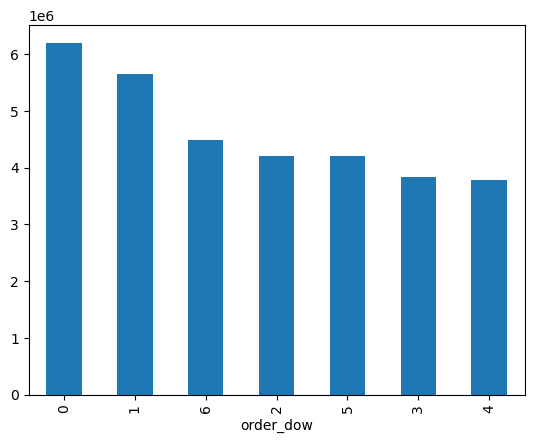

In [30]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

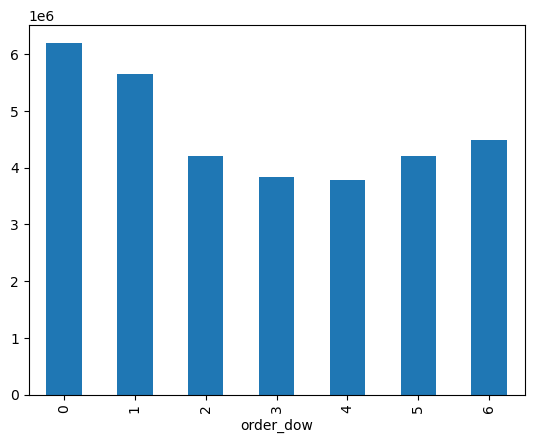

In [31]:
bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [32]:
bar.set_xlabel('order_days_of_week')
bar.set_title('Orders by days of the week')

Text(0.5, 1.0, 'Orders by days of the week')

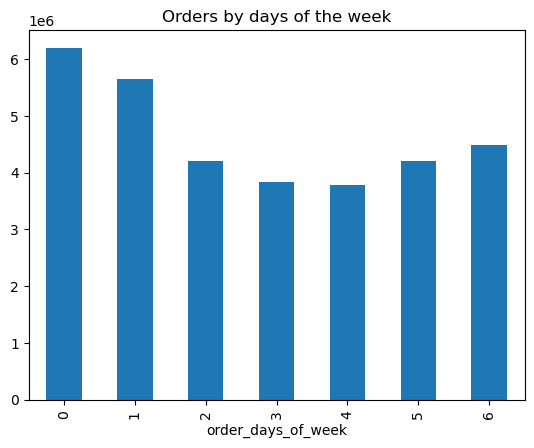

In [33]:
bar.figure

### Export it outside of Jupyter in the form of an image file

In [34]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

In [35]:
#a histogram of the “prices” column.

<Axes: ylabel='Frequency'>

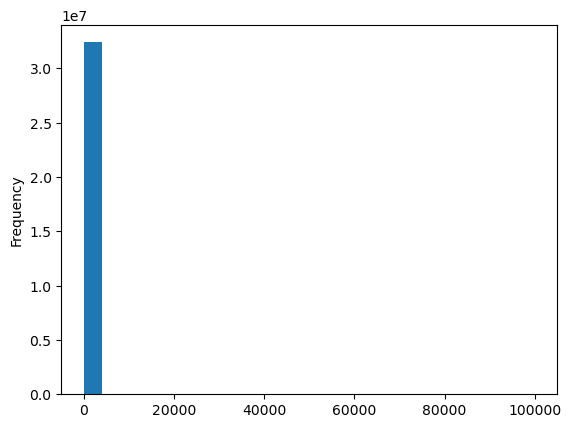

In [36]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [37]:
ords_prods_merge['prices'].describe()
#max is off

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [38]:
#create a scatterplot

<Axes: xlabel='prices', ylabel='prices'>

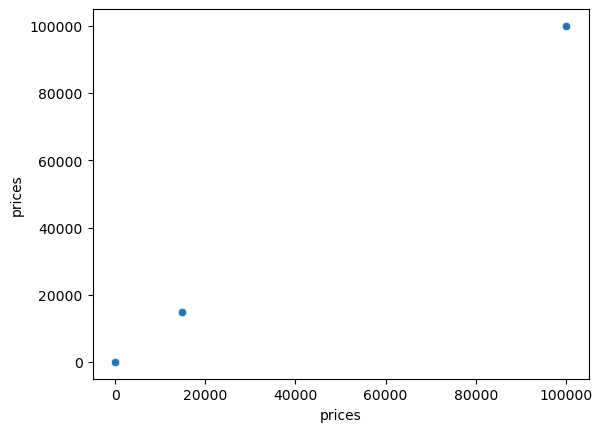

In [39]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [40]:
# If you imagined the maximum price anyone would pay in a supermarket were around $100, 
#then anything above that amount could be considered an outlier. Run this check via the following code:

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,merge_indicator,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,high_spender,5.0,Freq_customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,high_spender,5.0,Freq_customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,high_spender,12.0,Regular_customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average orders,4,New customer,1154.792308,high_spender,12.0,Regular_customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,high_spender,23.0,Non_Freq_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Most orders,25,Regular customer,351.141618,high_spender,6.0,Freq_customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most orders,25,Regular customer,170.073770,high_spender,13.0,Regular_customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Least busy,fewest orders,25,Regular customer,170.073770,high_spender,13.0,Regular_customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Average orders,5,New customer,938.031250,high_spender,7.0,Freq_customer


In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.expand_frame_repr', False)

In [42]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,merge_indicator,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,ave_prices,spend_flag,median_days_since_prior_order,freq_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,high_spender,5.0,Freq_customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,high_spender,5.0,Freq_customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,high_spender,12.0,Regular_customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest days,Average orders,4,New customer,1154.792308,high_spender,12.0,Regular_customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,high_spender,23.0,Non_Freq_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest days,Most orders,25,Regular customer,351.141618,high_spender,6.0,Freq_customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders,25,Regular customer,170.073770,high_spender,13.0,Regular_customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Least busy,fewest orders,25,Regular customer,170.073770,high_spender,13.0,Regular_customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Average orders,5,New customer,938.031250,high_spender,7.0,Freq_customer


In [43]:
#mark outliers as missing since they don’t make sense in terms of the other values in the column

In [44]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [45]:
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

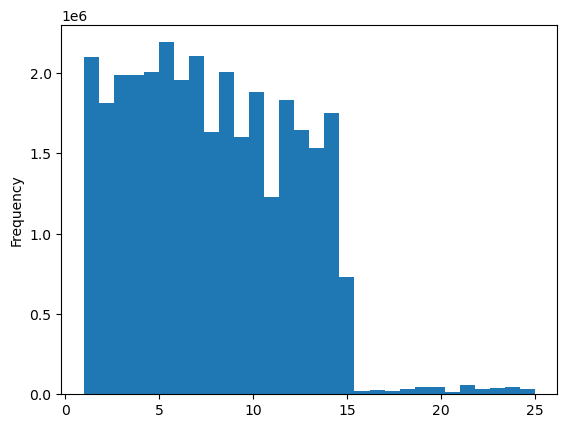

In [46]:
ords_prods_merge['prices'].plot.hist(bins = 30)



<Axes: ylabel='Frequency'>

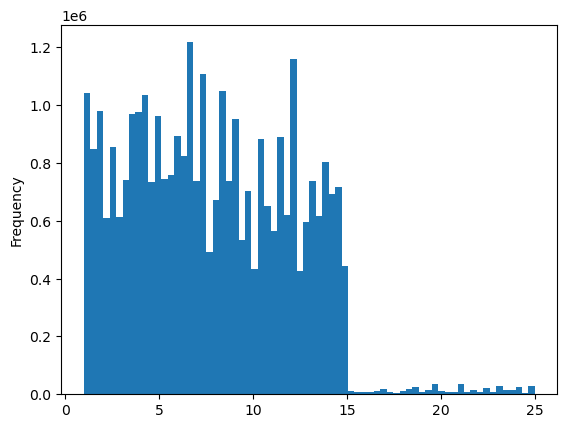

In [47]:
#To increase the level of granularity in the histogram, simply increase the number of bins
ords_prods_merge['prices'].plot.hist(bins = 70)

### Export it outside of Jupyter in the form of an image file


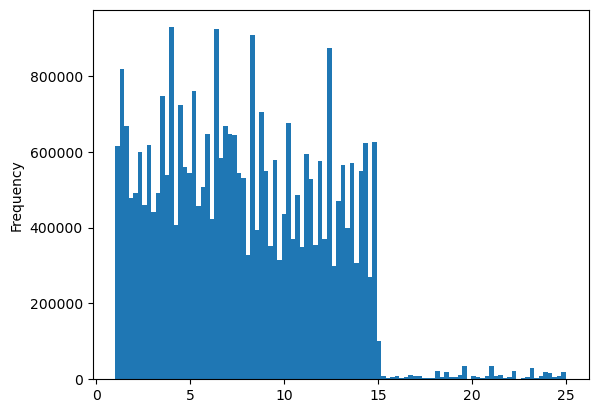

In [48]:
hist = ords_prods_merge['prices'].plot.hist(bins = 100)

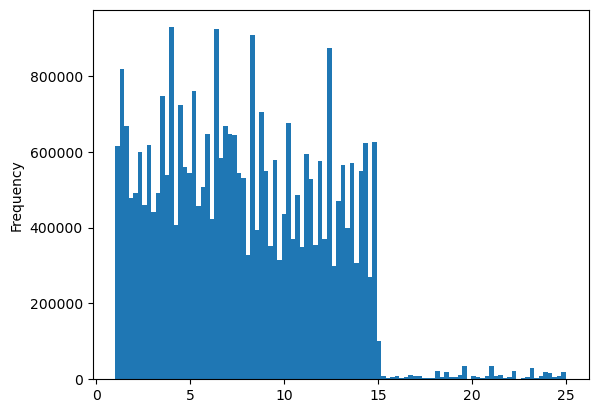

In [49]:
hist.figure

In [50]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_orders_dow.png'))

In [51]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

## Sampling data

In [52]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [53]:
#split your dataframe into two samples
big = ords_prods_merge[dev]

In [54]:
small = ords_prods_merge[~dev]


In [55]:
len(ords_prods_merge)

32404859

In [56]:
len(big) + len(small)

32404859

## Reduce your samples to only those columns necessary for the chart, namely “prices” and “order_dow.”

In [57]:
df_2 = small[['order_dow','prices']]


In [ ]:
#create your chart
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
